### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

#### Loading the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
!pip install inflection
import inflection
import warnings
warnings.filterwarnings("ignore")

In [3]:
marketing_data = pd.read_csv("marketing_data.csv")
marketing_data.shape

(2240, 28)

In [4]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
print(marketing_data.head())

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
# see what columns have missing data
marketing_data.isna().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
marketing_data.describe()

id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

#### Data cleaning

In [10]:
# column name into lower and more readable

marketing_data.columns = [inflection.underscore(col) for col in marketing_data.columns]
marketing_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

In [11]:
# converting income into float type

marketing_data["income"] = marketing_data["income"].replace('[\$,]', '', regex=True).astype(float)
marketing_data["income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [12]:
# replacing nan value with the mean of income 

marketing_data["income"] = marketing_data["income"].fillna(marketing_data["income"].mean())
marketing_data["income"].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

<IPython.core.display.Javascript object>


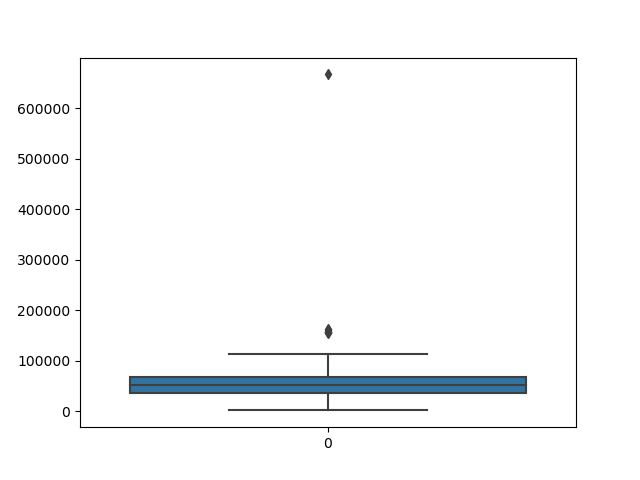

In [13]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

<IPython.core.display.Javascript object>


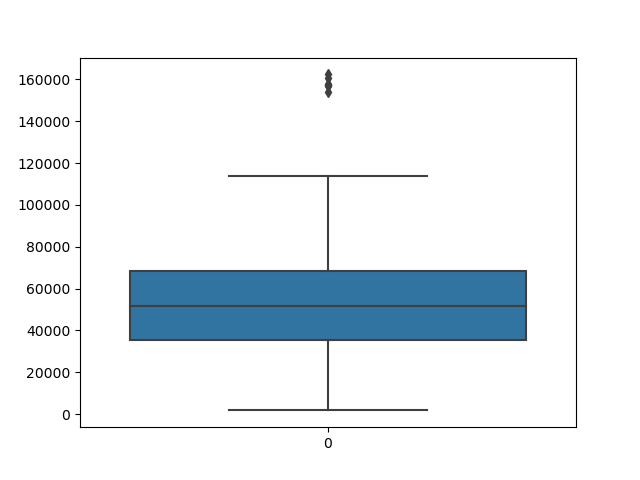

In [14]:
marketing_data = marketing_data[marketing_data["income"] < 300000]
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

#### Checking the Education Variable

<IPython.core.display.Javascript object>


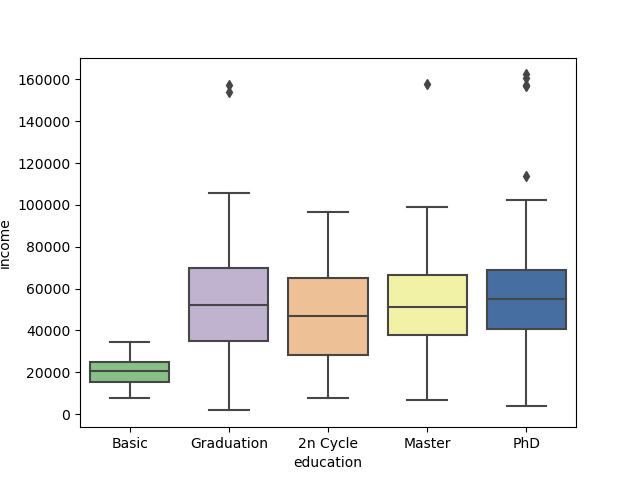

In [15]:
plt.figure()
sns.boxplot(x=marketing_data["education"], y=marketing_data["income"], palette='Accent',
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()

#### Adding an age Column 

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

In [16]:
# creating age column for eda
import datetime
marketing_data["age"] = datetime.datetime.now().year - marketing_data["year_birth"] 

<IPython.core.display.Javascript object>


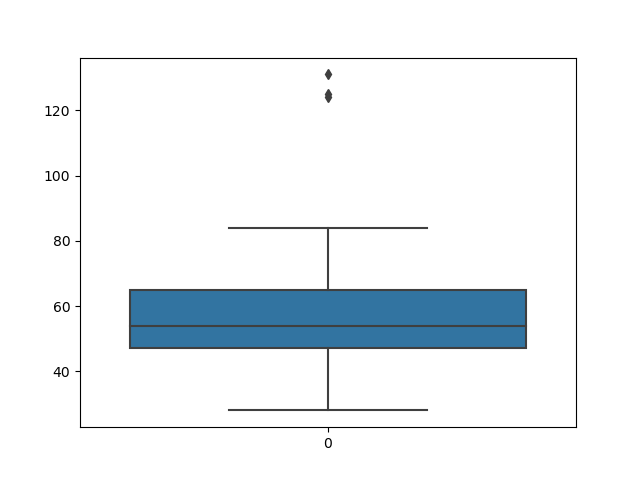

In [17]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

<IPython.core.display.Javascript object>


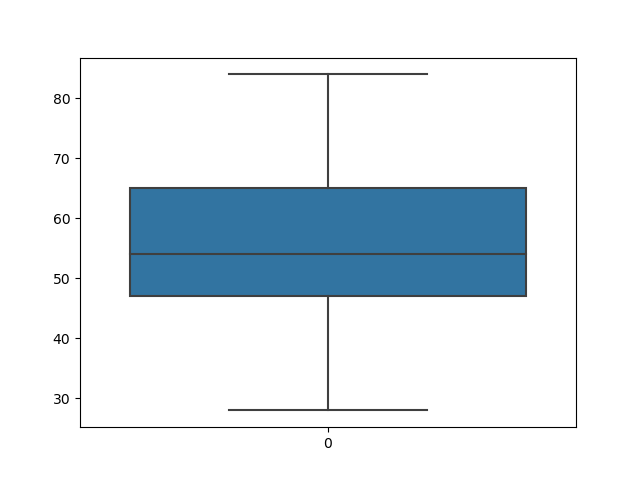

In [18]:
# removing outliers
marketing_data = marketing_data[marketing_data["age"] < 100]
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

##  EDA
### Purchasing behaviour by income

<IPython.core.display.Javascript object>


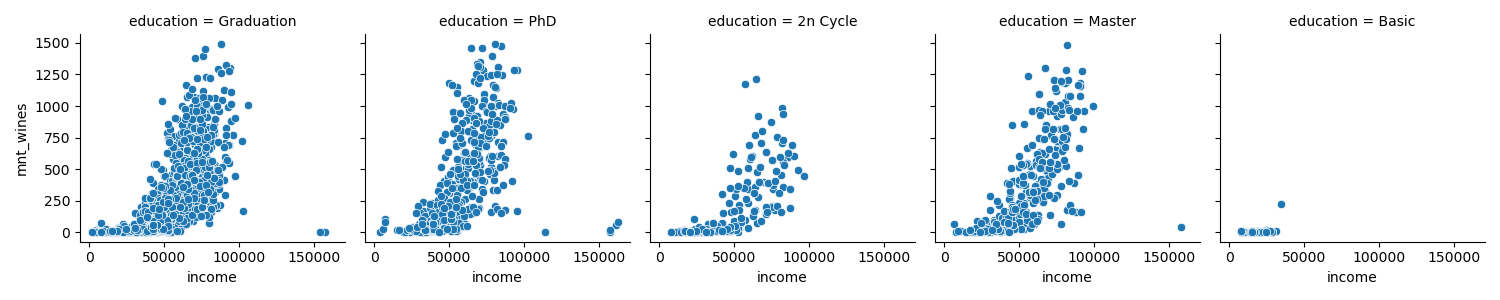

<IPython.core.display.Javascript object>


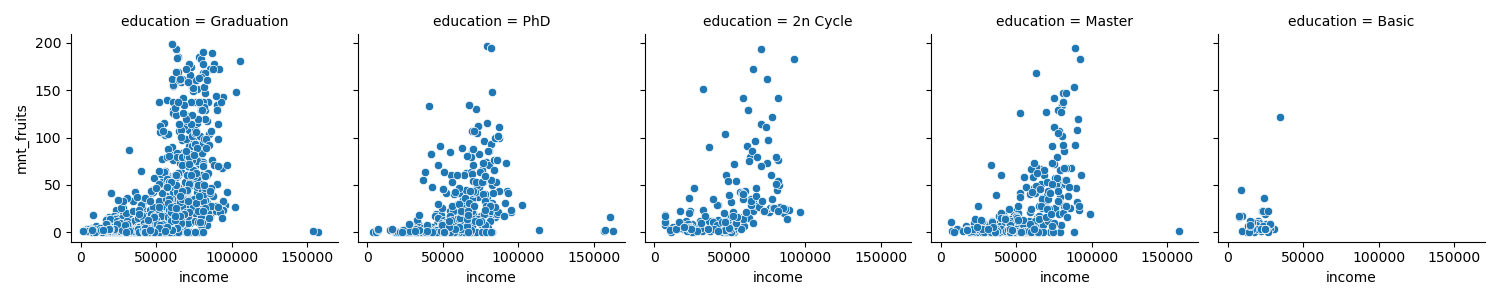

<IPython.core.display.Javascript object>


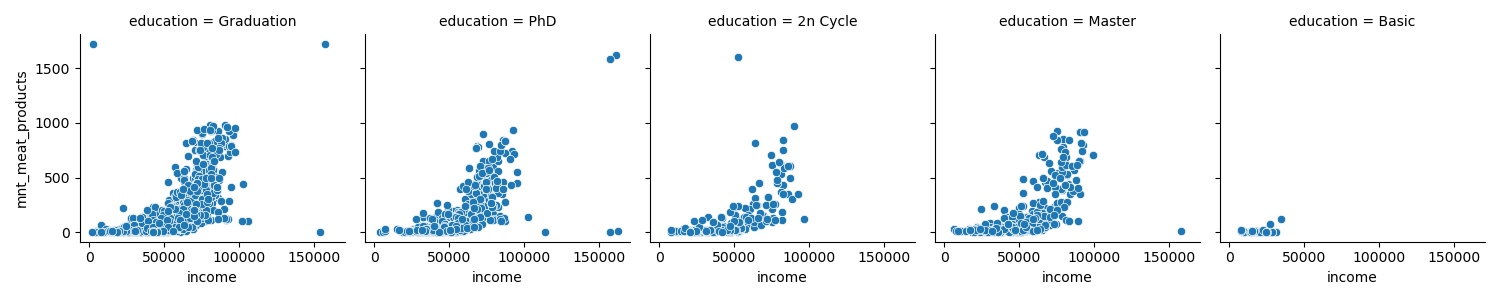

<IPython.core.display.Javascript object>


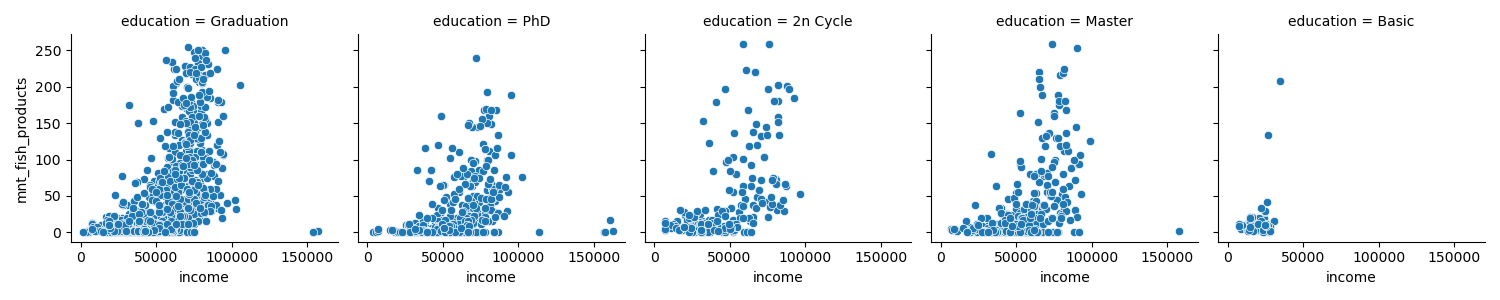

<IPython.core.display.Javascript object>


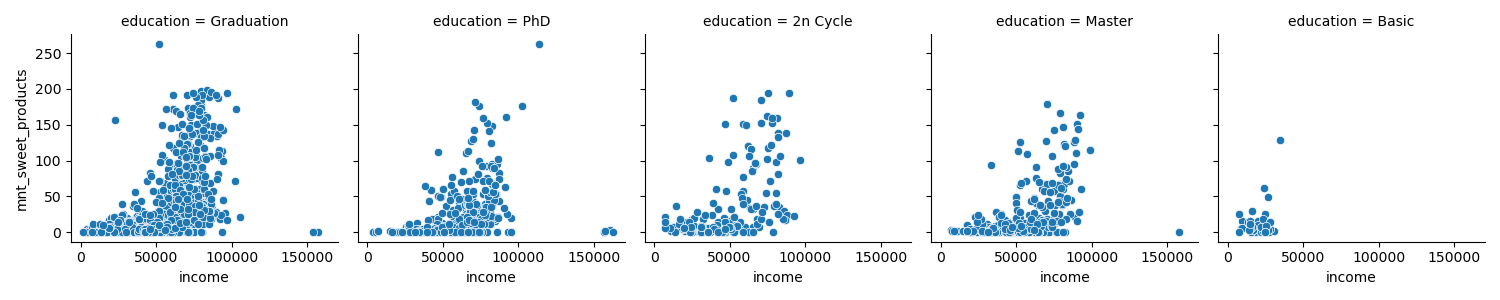

<IPython.core.display.Javascript object>


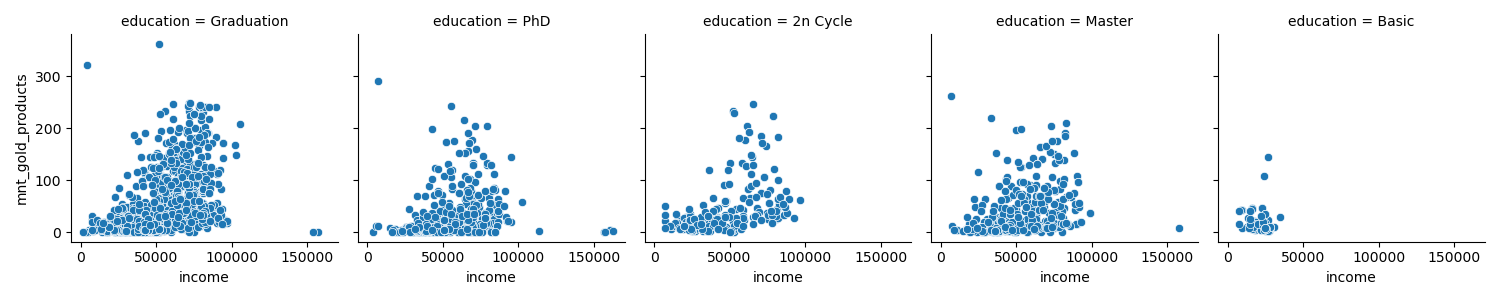

In [37]:
# how edcation effect income along with purchase 
variable_names = {}

amounts_col = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    variable_names["g{0}".format(i)]  = sns.FacetGrid(marketing_data, col="education")
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_col[i])
plt.show()

from the observations we can say that:
* `mnt_wines` has the strongest positive, linear relationship with education by income.
* There is a positive, linear relationship for each `mnt_{type}_products`.
* This store with a `Basic education level`, does not have many shoppers.


To have more better understanding we can use bar

<IPython.core.display.Javascript object>


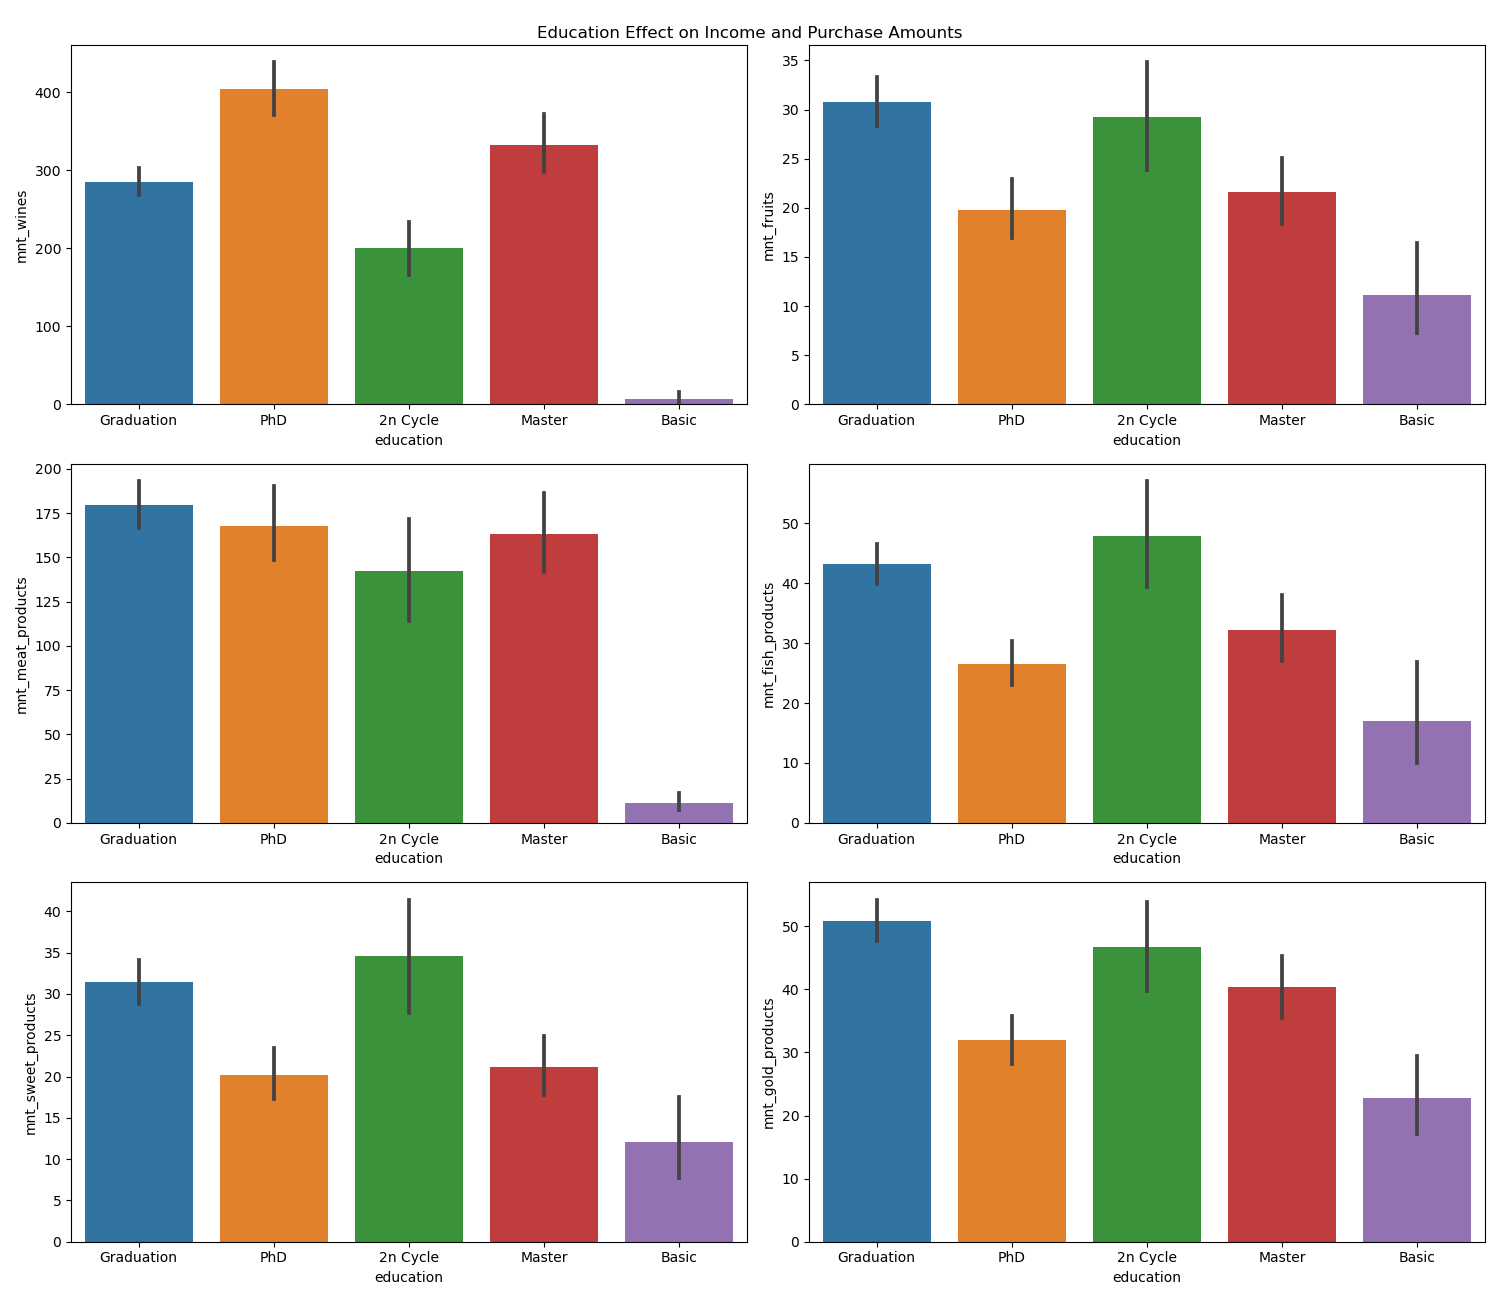

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(15, 13))
fig.suptitle("Education Effect on Income and Purchase Amounts")

for i, col in enumerate(amounts_col):
    sns.barplot(x="education", y=col, data=marketing_data, ax=axes[i // 2, i % 2])

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


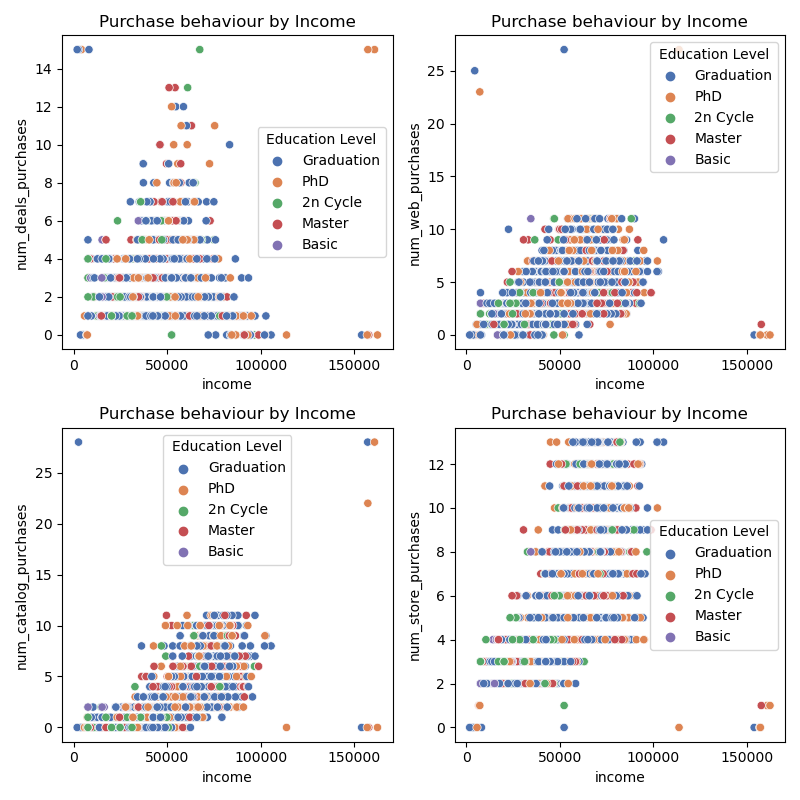

In [19]:
purchase_col = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(purchase_col)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.scatterplot(x=marketing_data["income"], y=marketing_data[purchase_col[i]],
                    hue=marketing_data["education"], palette="deep")
    plt.title("Purchase behaviour by Income")
    ax.set_xticks([0, 50000, 100000, 150000])
    plt.legend(title="Education Level")
plt.tight_layout()
plt.show()

There is a positive linear relationship between `income` and three variables: 
 `num_catalog_purchases`
 `num_store_purchases`
 `num_web_purchases`

However there is no clear link between income and `NumDealsPurchases`.Maybe a weak, negative link, but not sure
Education patterns hard to see, need more analysis.

<IPython.core.display.Javascript object>


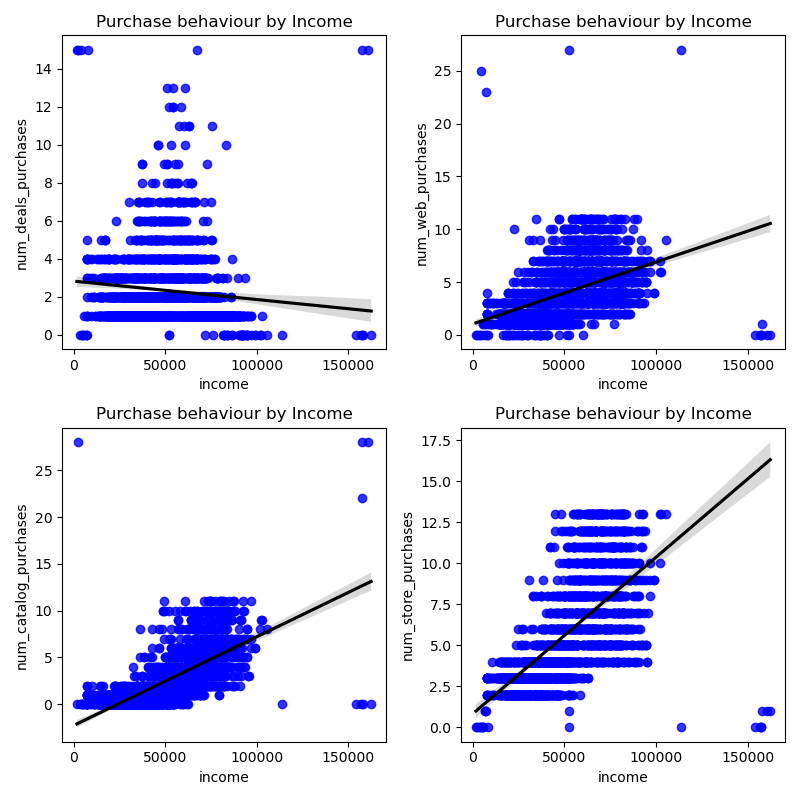

In [21]:
purchase_col = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(purchase_col)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.regplot(x=marketing_data["income"], y=marketing_data[purchase_col[i]],
               scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.title("Purchase behaviour by Income")
    ax.set_xticks([0, 50000, 100000, 150000])
plt.tight_layout()
plt.show()

To better understand linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have 
the strongest positive, linear relationship with income.These plots also show that income and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak.
For further analysis, a new column in the DataFrame called total_purchases is added to the marketing_data DataFrame.
The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [22]:
# creating total purchases column
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_web_purchases"]+marketing_data["num_catalog_purchases"]+marketing_data["num_store_purchases"]

<IPython.core.display.Javascript object>


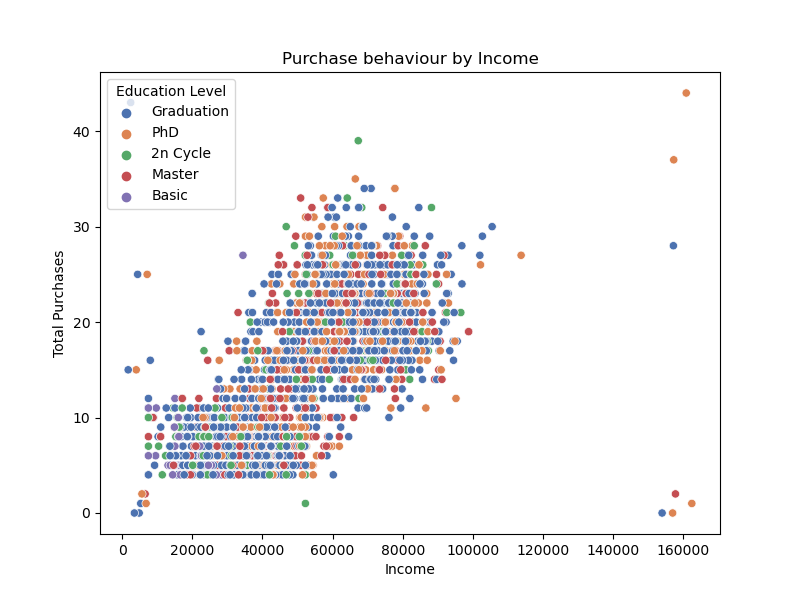

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=marketing_data["income"], y=marketing_data["total_purchases"],
                hue=marketing_data["education"], palette='deep')
plt.title("Purchase behaviour by Income")
plt.xlabel("Income")
plt.ylabel("Total Purchases")
plt.legend(title="Education Level")
plt.show()

<IPython.core.display.Javascript object>


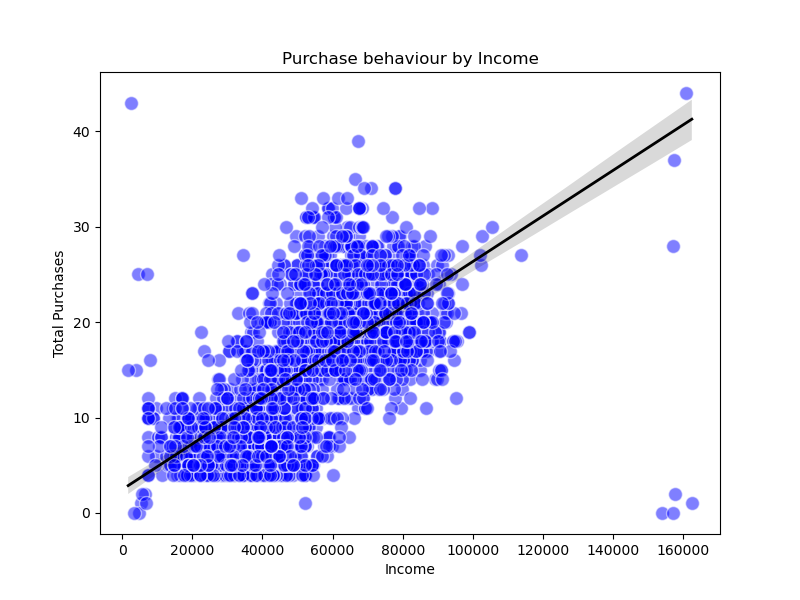

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x=marketing_data["income"], y=marketing_data["total_purchases"],
            scatter_kws={"color": "blue", "s": 100, "edgecolor": "w", "alpha": 0.5},
            line_kws={"color": "black", "linewidth": 2})
plt.title("Purchase behaviour by Income")
plt.xlabel("Income")
plt.ylabel("Total Purchases")
plt.show()

Relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the education and `total_purchases` as the points are scattered randomly across the plot.

<IPython.core.display.Javascript object>


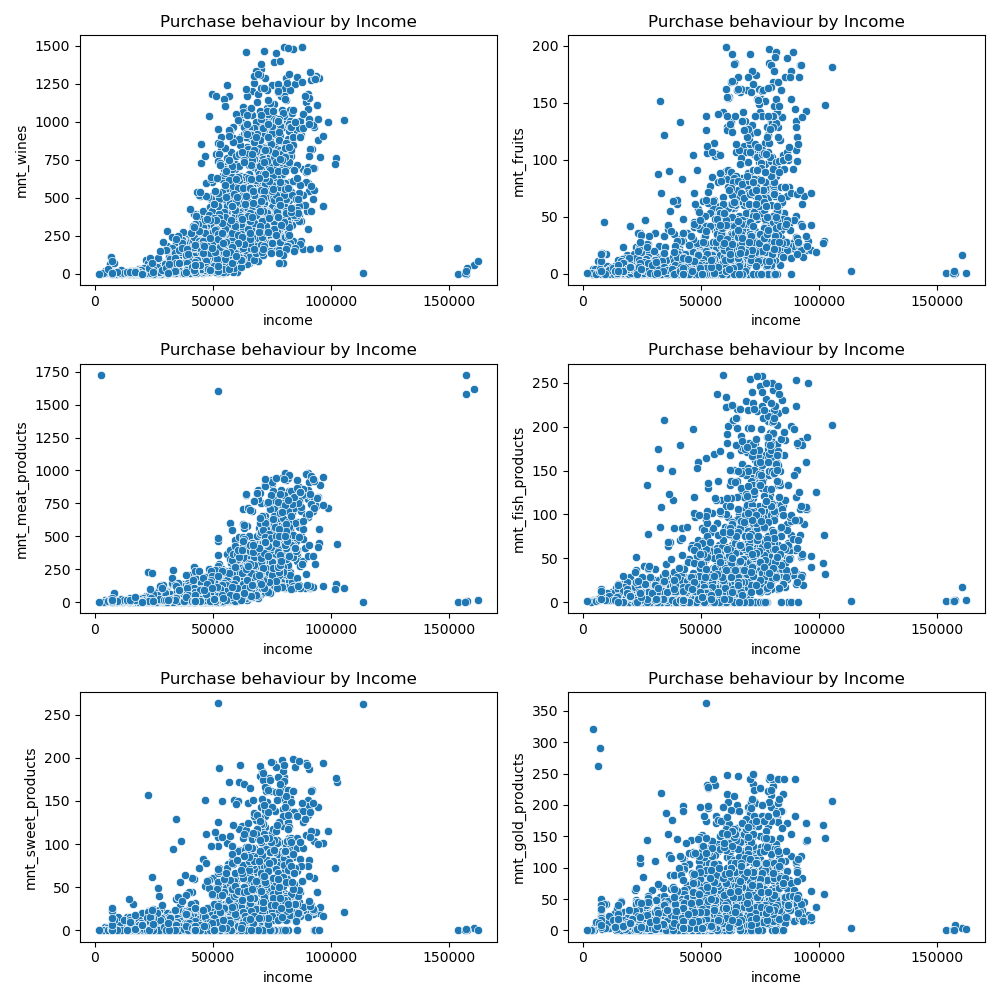

In [25]:
amounts_col = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0
fig = plt.figure(figsize=(10, 10))
for i in range(len(amounts_col)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(x=marketing_data["income"], y=marketing_data[amounts_col[i]])
    plt.title("Purchase behaviour by Income")
    ax.set_xticks([0, 50000, 100000, 150000])
plt.tight_layout()
plt.show()

All the plots shows positive relationship between `income` and `mnt_{type}_products` but still visualy not good enough to say it's linear. So `np.log` is used to get a better look at the linear relationships.

<IPython.core.display.Javascript object>


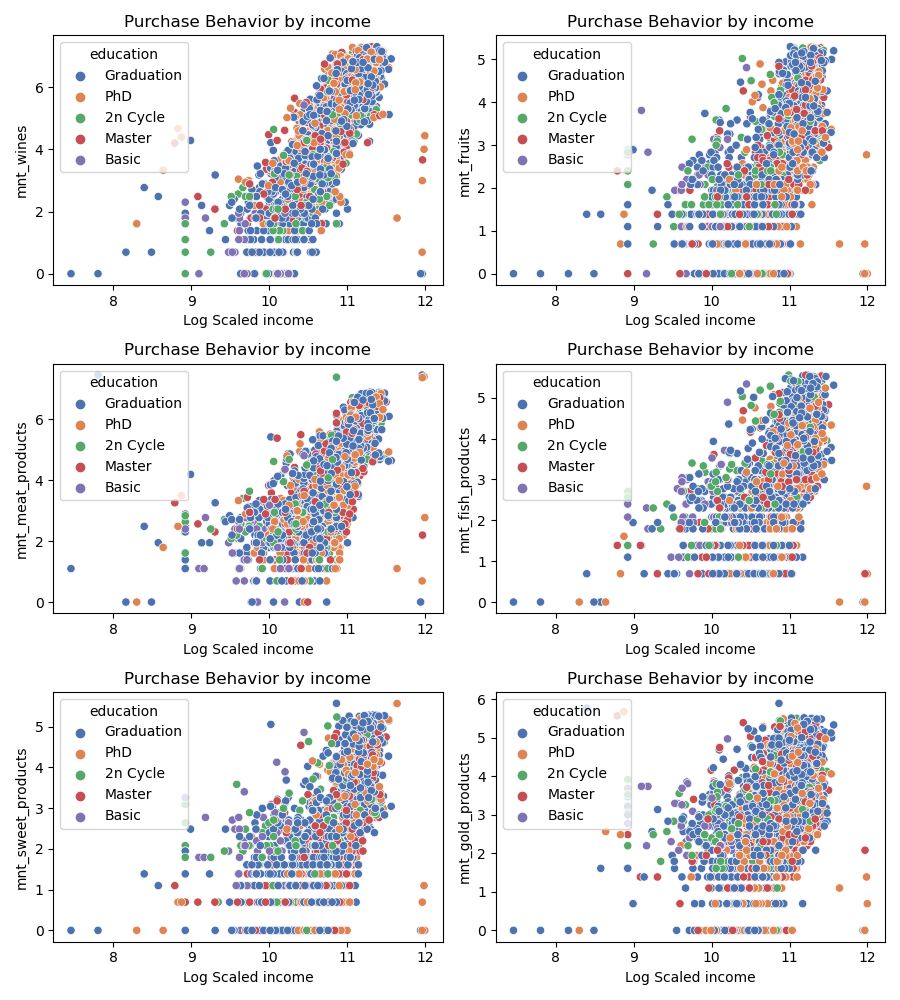

In [26]:
amounts_col = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes = [None for column in amounts_col]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_col)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(x=np.log(marketing_data["income"]), y=np.log(marketing_data[amounts_col[i]]),
                    hue=marketing_data["education"], palette="deep")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

using log now it's more clearly that there is a postitve and strong linear relationship

### Purchase behaviour by age

<IPython.core.display.Javascript object>


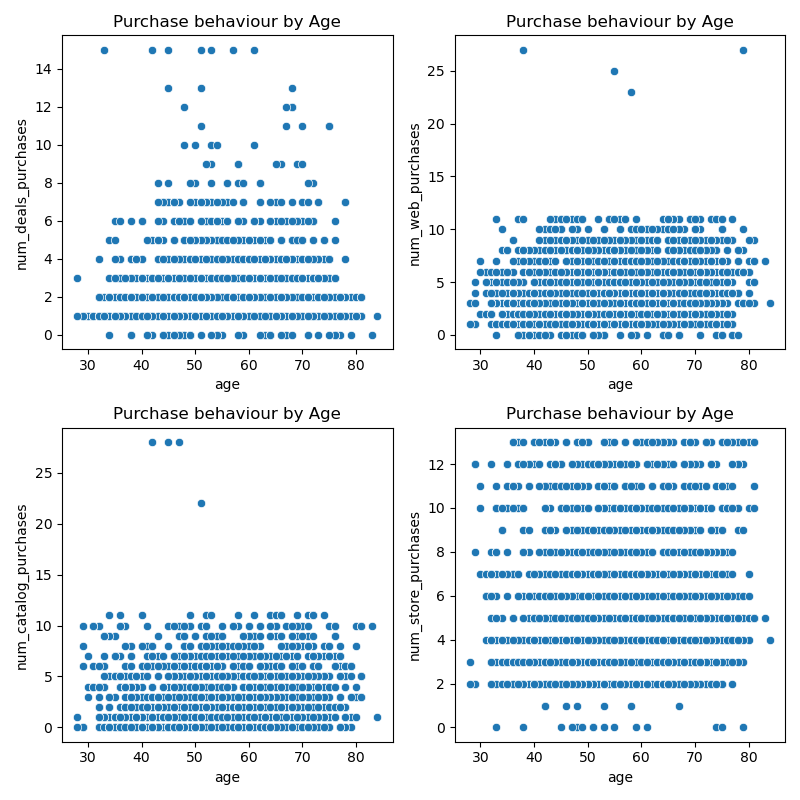

In [27]:
purchase_col = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(purchase_col)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.scatterplot(x=marketing_data["age"], y=marketing_data[purchase_col[i]])
    plt.title("Purchase behaviour by Age")
plt.tight_layout()
plt.show()

It's difficult to identify any pattern between `age` and `num_{type}_purchase`.

<IPython.core.display.Javascript object>


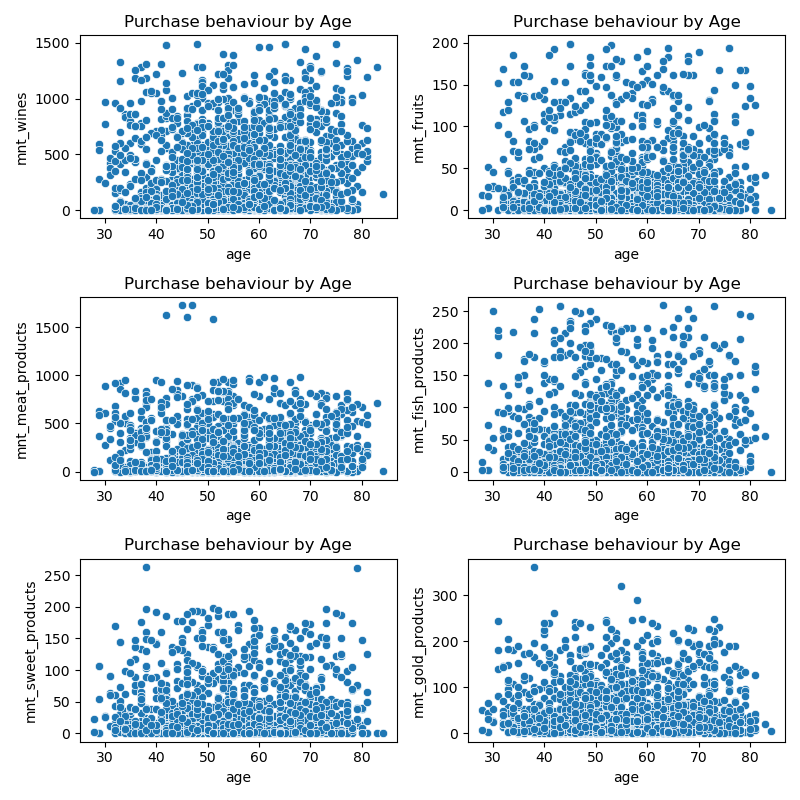

In [28]:
amounts_col = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(amounts_col)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(x=marketing_data["age"], y=marketing_data[amounts_col[i]])
    plt.title("Purchase behaviour by Age")
plt.tight_layout()
plt.show()

It's still difficult to identify any patters so a different analysis menthod have to take.

In [29]:
bins = [18, 35, 50, 70, 150]
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# Create 'age_group' column using pd.cut

marketing_data['age_group'] = pd.cut(marketing_data.age, bins=bins, labels=labels)
marketing_data.head()


id  year_birth   education marital_status   income  kidhome  teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  dt_customer  recency  mnt_wines  ...  accepted_cmp4  accepted_cmp5  \
0     6/16/14        0        189  ...              0              0   
1     6/15/14        0        464  ...              0              0   
2     5/13/14        0        134  ...              0              0   
3     5/11/14        0         10  ...              0              0   
4      4/8/14        0          6  ...              0              0   

   accepted_cmp1  accepted_cmp2  response  complain  country  age  \
0              0              0         1         0       SP   54   
1              0              1         1         0       CA   63   
2              0              0         0         0       US   66   
3              0              0         0         0      AUS   57   
4              0              0         1         0       SP   35   

   total_purchases  age_group  
0               15   51 to 70  
1               18   51 to 70  
2               11   51 to 70  
3                4   51 to 70  
4                8   18 to 35  

[5 rows x 31 columns]

In [30]:
age_group_count = marketing_data.groupby("age_group").age.count().reset_index()
age_group_count

age_group   age
0      18 to 35    91
1      36 to 50   755
2      51 to 70  1124
3  71 and Older   266

<IPython.core.display.Javascript object>


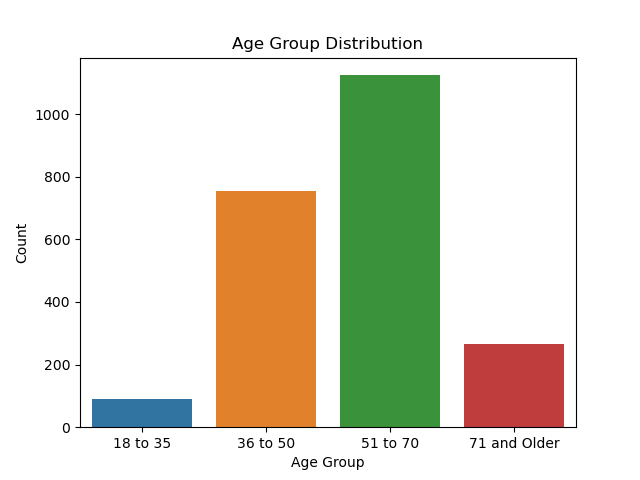

In [57]:
plt.figure()

sns.barplot(x=age_group_count["age_group"], y=age_group_count["age"])
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")

# show the plot
plt.show()

<IPython.core.display.Javascript object>


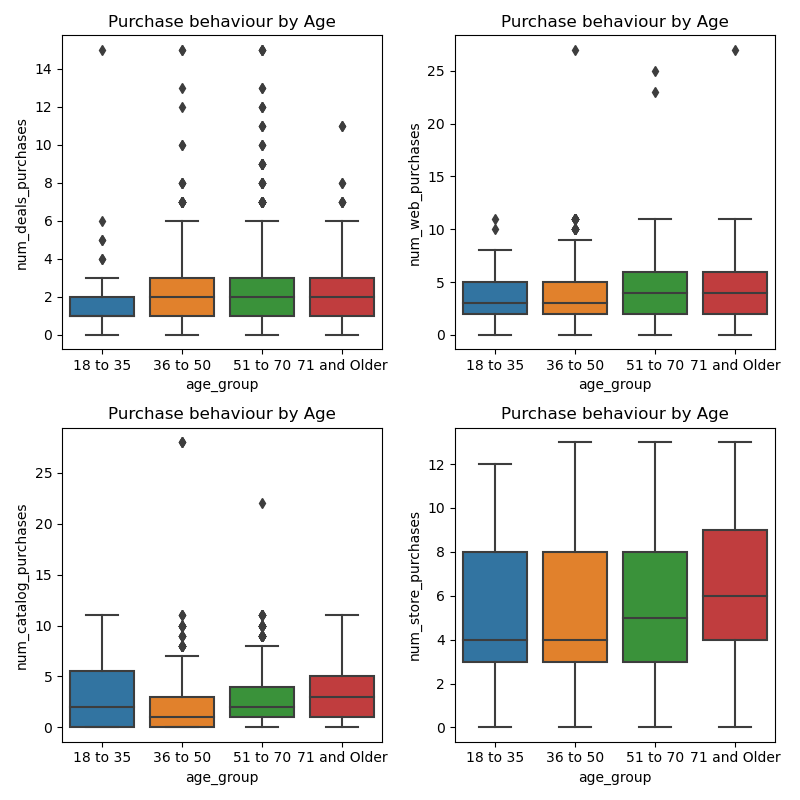

In [32]:
purchase_col = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(purchase_col)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.boxplot(x=marketing_data["age_group"], y=marketing_data[purchase_col[i]])
    plt.title("Purchase behaviour by Age")
plt.tight_layout()
plt.show()

From the visualization we can say that `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
`36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.
This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

<IPython.core.display.Javascript object>


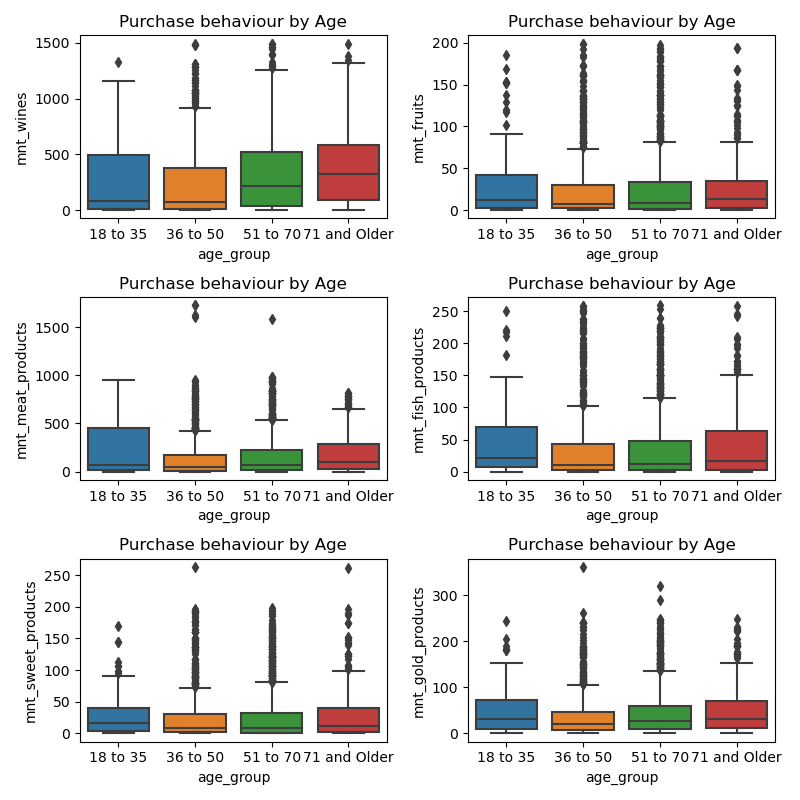

In [33]:
amounts_col = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0
fig = plt.figure(figsize=(8, 8))
for i in range(len(amounts_col)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.boxplot(x=marketing_data["age_group"], y=marketing_data[amounts_col[i]])
    plt.title("Purchase behaviour by Age")
plt.tight_layout()
plt.show()

In [34]:
age_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_amounts['age_group'] = pd.cut(age_amounts.age, bins=bins, labels=labels)
age_amounts = age_amounts.groupby('age_group').sum().reset_index()
age_amounts

age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   3019      26556        3084              22017   
1      36 to 50  33525     182179       18870             114283   
2      51 to 70  66898     366449       29288             183785   
3  71 and Older  19766     104845        7511              53290   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               4293                2785               4695  
1              26841               20153              29673  
2              41156               29674              50245  
3              11641                7940              13733

<IPython.core.display.Javascript object>


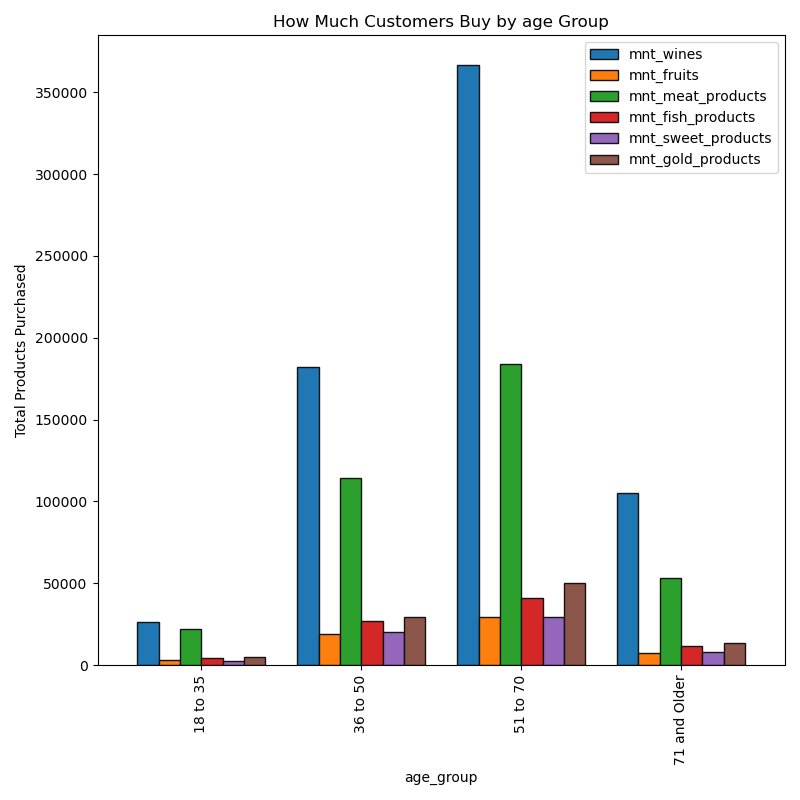

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

product_col = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products']

age_amounts.plot(x='age_group', y=product_col, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

### Conclusion

It has been shown `income` has the strongest relationship with `purchase behavior` of customers.. But, we've also found interesting connections with education and age. Understanding these can help the store decide how to promote deals and set prices, especially for items like wine, as wealthier people tend to buy more alcohol. There's a chance to attract more customers from the age groups of `18 to 35` and `71 and older` to boost product sales.